In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
train=pd.read_csv("../data/train.csv")
compaign=pd.read_csv("../data/campaign_data.csv")
coupon_item_mapping=pd.read_csv("../data/coupon_item_mapping.csv")
customer_demographics=pd.read_csv("../data/customer_demographics.csv")
customer_transaction=pd.read_csv("../data/customer_transaction_data.csv")
item=pd.read_csv("../data/item_data.csv")
test=pd.read_csv("../data/test_QyjYwdj.csv")

In [3]:
compaign.isnull().sum()
coupon_item_mapping.isnull().sum()
customer_demographics.isnull().sum()


campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

coupon_id    0
item_id      0
dtype: int64

customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

In [4]:
train.shape
compaign.shape
customer_demographics.shape
customer_transaction.shape
item.shape

(78369, 5)

(28, 4)

(760, 7)

(1324566, 7)

(74066, 4)

In [5]:
redem_status=train.pop("redemption_status")

In [16]:
total_df=pd.concat([train,test],axis=0)
total_df.shape

(128595, 4)

In [56]:
# Merge relevant columns to total_df
compaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [71]:
def isnunique(series):
    print(len(np.unique(series.values)),series.shape[0])
    #print(np.unique(series.values),series.shape[0],series.unique(),set(series))
    return len(np.unique(series.values))==series.shape[0]

In [88]:
customer_transaction.item_id.unique().shape,coupon_item_mapping.item_id.unique().shape

((74063,), (36289,))

In [90]:
pd.Series(coupon_item_mapping.item_id.unique()).isin(customer_transaction.item_id.unique()).sum()#.shape

36286

In [82]:
isnunique(compaign.campaign_id)
isnunique(customer_demographics.customer_id)
isnunique(customer_transaction.customer_id)
isnunique(item.item_id)
isnunique(coupon_item_mapping.coupon_id)
isnunique(coupon_item_mapping.item_id)
isnunique(train.id)
isnunique(test.id)

28 28


True

760 760


True

1582 1324566


False

74066 74066


True

1116 92663


False

36289 92663


False

78369 78369


True

50226 50226


True

In [63]:
redem_status.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [99]:
total_df=total_df.merge(compaign,how='left').\
            merge(customer_demographics,how='left').\
                merge(coupon_item_mapping,on="coupon_id",how='left').merge(item, on='item_id',how='left')
total_df.shape

KeyboardInterrupt: 

In [20]:
total_df.id.unique()
total_df.head()

array([     1,      2,      6, ..., 128591, 128593, 128594], dtype=int64)

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id,brand,brand_type,category
0,1,13,27,1053,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,24775,1636,Established,Grocery
1,1,13,27,1053,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,14958,1636,Established,Grocery
2,1,13,27,1053,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,40431,1636,Established,Grocery
3,1,13,27,1053,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,20749,1636,Established,Grocery
4,1,13,27,1053,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,56860,1636,Established,Grocery


In [32]:
total_df.columns[total_df.columns.str.contains("_id")]

Index(['campaign_id', 'coupon_id', 'customer_id', 'item_id'], dtype='object')

In [27]:
cols=total_df.columns[~ total_df.columns.str.contains("_id")]

In [30]:
total_df[cols].head(100)

,id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category
0,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
1,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
2,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
3,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
4,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
5,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
6,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
7,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
8,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery
9,1,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,1636,Established,Grocery


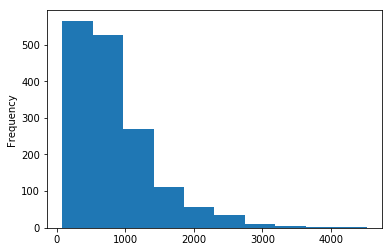

In [38]:
customer_transaction.customer_id.value_counts().plot(kind="hist")

In [43]:
customer_transaction.dtypes
customer_transaction.nunique()

date                object
customer_id          int64
item_id              int64
quantity             int64
selling_price      float64
other_discount     float64
coupon_discount    float64
dtype: object

date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923
other_discount      1418
coupon_discount      232
dtype: int64

In [39]:
agg_cust_trans=customer_transaction.groupby("customer_id").sum()

In [41]:
agg_cust_trans.shape,customer_transaction.shape

((1582, 5), (1324566, 7))

In [45]:
customer_transaction.head()
agg_cust_trans.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


,item_id,quantity,selling_price,other_discount,coupon_discount
customer_id,,,,,
1,31712801,1227,98513.93,-17030.40,-2116.83
2,12698104,474,43100.03,-7051.95,-249.34
3,20205585,8163,73050.27,-16013.53,-2179.54
4,6180732,280,33973.22,-2927.19,-89.05
5,26024517,93353,103615.10,-10817.07,-90.83


In [49]:
customer_transaction.loc[customer_transaction.customer_id==1,:]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
30179,2012-02-21,1,4953,1,142.12,0.00,0.00
30180,2012-02-21,1,5626,1,106.50,0.00,0.00
30181,2012-02-21,1,7808,1,99.38,-42.74,0.00
30182,2012-02-21,1,8107,1,256.11,-46.31,0.00
30183,2012-02-21,1,8307,1,89.05,-17.45,0.00
30184,2012-02-21,1,14054,1,53.07,0.00,0.00
30185,2012-02-21,1,17047,2,106.50,-106.50,0.00
30186,2012-02-21,1,17559,1,49.51,-17.81,0.00
30187,2012-02-21,1,18807,1,56.64,0.00,0.00
30188,2012-02-21,1,20811,1,35.62,-17.45,0.00


In [9]:
def get_df_chunkwise(df):
    for i in range(0,df.shape[0]-1000,1000):
        yield df[i:i+1000]

In [11]:
first=True
for transaction in tqdm_notebook(get_df_chunkwise(customer_transaction),desc="merging"):
    temp=total_df.merge(transaction,how='left',on="customer_id")
    if first:
        temp.to_csv("../data/merge_df.csv",header=True,index=False)
        first=False
    else:
        temp.to_csv("../data/merge_df.csv",header=False,index=False,mode="a")

KeyboardInterrupt: 

## Droped this plan of manual Feature Engineering
- Causes Memory issues
- Error in Aggregations when combining different dataframes (entities)

## Moving to FeatureTools

## Trying again with grouping the transcations for each customer_id

In [51]:
agg_cust_trans=customer_transaction.groupby("customer_id").sum()

In [53]:
#11842495,17
total_df.merge(agg_cust_trans,on='customer_id',how='left')

(11842495, 22)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F083071B00>,
      dtype=object)

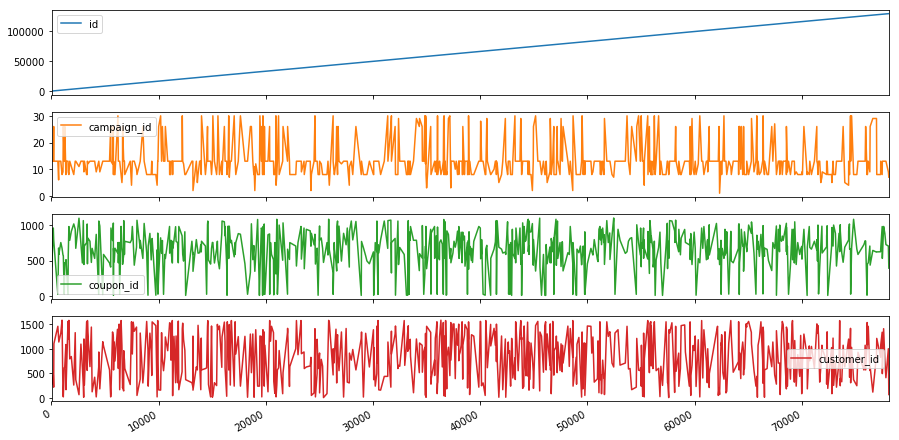

In [94]:
train.loc[redem_status==1].plot(subplots=True,figsize=(15,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F083B908D0>,
      dtype=object)

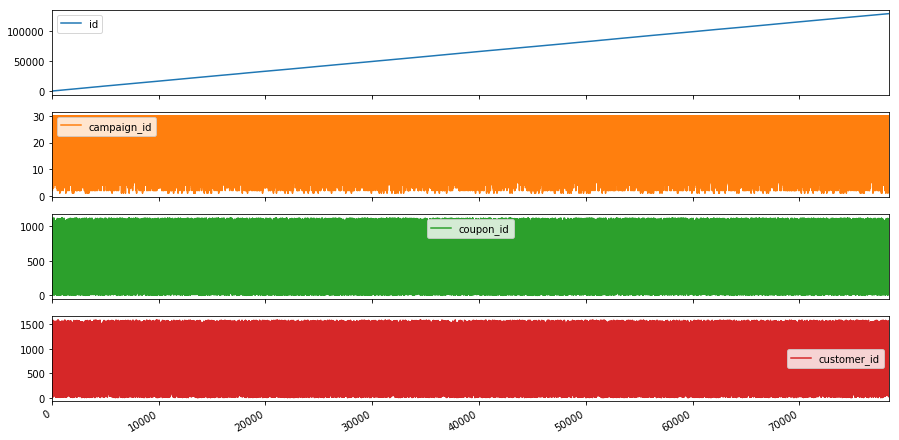

In [98]:
train.loc[redem_status==0].plot(subplots=True,figsize=(15,8))

In [101]:
train_df=train.merge(compaign,how='left').\
            merge(customer_demographics,how='left').\
                merge(coupon_item_mapping,on="coupon_id",how='left').merge(item, on='item_id',how='left')
train_df.shape

(6420694, 17)

In [110]:
coupon_item_mapping.shape
coupon_item_mapping.drop_duplicates(subset=['coupon_id','item_id']).shape
coupon_item_mapping.nunique()

(92663, 2)

(92663, 2)

coupon_id     1116
item_id      36289
dtype: int64

In [114]:
t5=coupon_item_mapping.merge(item, on='item_id',how='left')

In [116]:
t5.nunique()

coupon_id      1116
item_id       36289
brand          2555
brand_type        2
category         17
dtype: int64

In [122]:
t5[t5.item_id==4]

,coupon_id,item_id,brand,brand_type,category
18860,166,4,56,Local,Grocery
30395,327,4,56,Local,Grocery
31530,82,4,56,Local,Grocery


In [132]:
t6=t5.groupby(["coupon_id"])['item_id'].count() #since for every item_id ,brand,brand_type,category are unique (means they are same)
t6.shape

(1116,)

In [133]:
train.shape
t1=train.merge(compaign,how='left')
t1.shape
t2=t1.merge(customer_demographics,how='left')
t2.shape
t3=t2.merge(t6,on="coupon_id",how='left')
t3.shape

(78369, 4)

(78369, 7)

(78369, 13)

(78369, 14)

In [134]:
t3.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,item_id
0,1,13,27,1053,X,19/05/13,05/07/13,46-55,NaN,0.0,1,NaN,5.0,125
1,2,13,116,48,X,19/05/13,05/07/13,36-45,Married,0.0,2,NaN,3.0,3
2,6,9,635,205,Y,11/03/13,12/04/13,46-55,Married,0.0,2,NaN,7.0,67
3,7,13,644,1050,X,19/05/13,05/07/13,NaN,NaN,NaN,NaN,NaN,NaN,4
4,9,8,1017,1489,X,16/02/13,05/04/13,46-55,Married,0.0,2,NaN,3.0,32


In [ ]:
def read_prepare_data():
    read_data()